In [78]:
from dubins import connect
from propagate import *


import numpy as np
import matplotlib.pyplot as plt
from plot import plot2dcov
from nodes_edges import Edge, BeliefNode
%matplotlib notebook
def propagate(edge, start_belief, dt):
    Sigma = start_belief.Sigma
    states = edge.states
    actions = edge.actions
    state = states[0]
    Lambda = start_belief.Lambda
    xy_error = 0.0001
    theta_error = 0.0001
    measurement_error = 0.00001
    k = 1e-9
    observable_check_const = 1

#         if (is_state_observable(env,tuple(state[:2]), observable_check_const)):
#             measurement_error = 1e-6

    kalman = DynamicModel(xy_error, theta_error,measurement_error, dt,k)

    for action in actions:
        kalman.predict(state, action, Sigma)
        kalman.update(Lambda)
        state = kalman.x_updated
        Sigma = kalman.Sigma_updated
        Lambda = kalman.Lambda
    return BeliefNode(Sigma, Lambda, len(actions))    

<IPython.core.display.Javascript object>


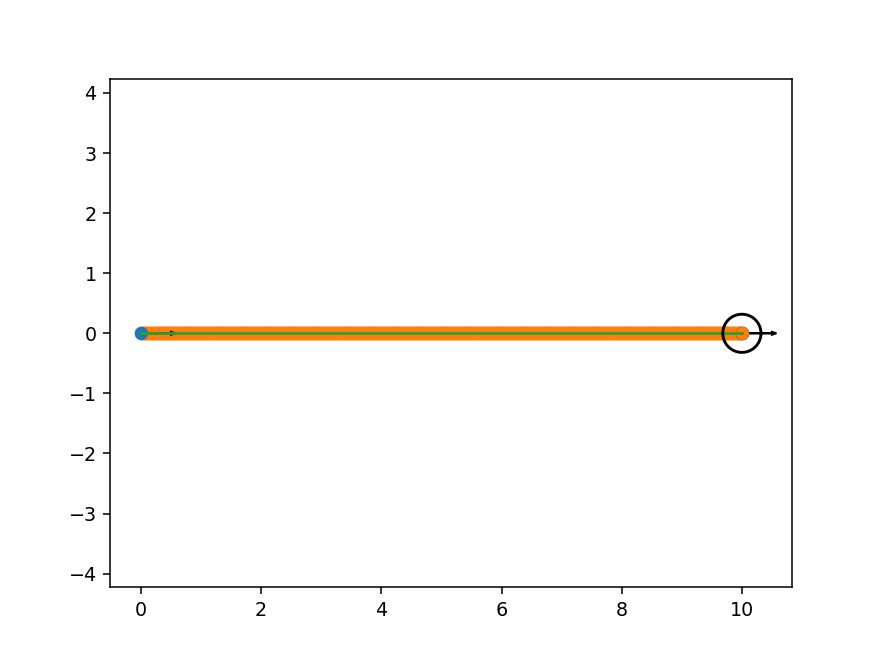

[[ 1.01090838e-01 -5.10407748e-10  0.00000000e+00]
 [-5.10407748e-10  1.01090839e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.01090838e-01]]


In [84]:
start = [0,0, 0]
end = [10,0, 0]
# dt = 1e-3

dt = 1e-2
edge = connect(start, end, dt =dt, plot = True)
edge_test = Edge(edge[0], edge[1])
belief_test = BeliefNode(np.eye(3)*0.001,np.zeros((3,3)), 0)
belief_output = propagate(edge_test, belief_test, dt)
print(belief_output.Lambda )
plot2dcov(end[:2], (belief_output.Lambda)[:2,:2])

In [6]:
import numpy as np

def AppendBelief(v, new_belief, eps):
    dominated = True
    for node in v.nodes:
        if np.linalg.norm(new_belief.Sigma) < np.linalg.norm(node.Sigma+np.eye(3)*eps) and
        np.linalg.norm(new_belief.Lambda) < np.linalg.norm(node.Lambda+np.eye(3)*eps) and
        new_belief.cost < node.cost:
            dominated = False
    if dominated:
        return False
    else:
        to_delete = []
        for node in v.nodes.copy():
            if (np.linalg.norm(new_belief.Sigma) < np.linalg.norm(node.Sigma) and
            np.linalg.norm(new_belief.Lambda) < np.linalg.norm(node.Lambda) and
            new_belief.cost < node.cost_:
                v.nodes.remove(node)
    v.nodes.append(new_belief)

SyntaxError: invalid syntax (<ipython-input-6-ce52c83a59c9>, line 6)